# Fraud  Loan Prediction 

#### Whether to give loan to a person or not based on the information .



In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import dataset
df=pd.read_csv('LoanPrediction')

In [3]:
#shape
df.shape

(614, 13)

In [4]:
# dataset contain 614 rows and 13 column

In [5]:
#first 5 rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
#check null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

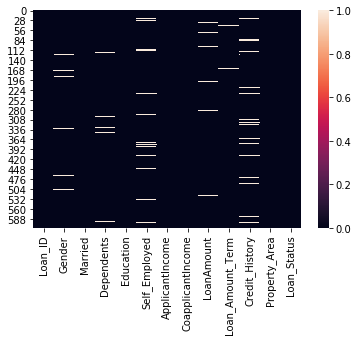

In [8]:
sns.heatmap(df.isnull())

In [9]:
#dataset contain null value hich need to be treated
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
df['Gender']=df['Gender'].fillna('Male')

In [11]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [12]:
df['Self_Employed']=df['Self_Employed'].fillna('No')

In [13]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
128.0    11
113.0    11
130.0    10
96.0      9
95.0      9
70.0      8
115.0     8
112.0     8
150.0     7
135.0     7
136.0     7
132.0     7
125.0     7
104.0     7
80.0      6
81.0      6
138.0     6
90.0      6
158.0     6
116.0     6
175.0     6
144.0     6
155.0     6
180.0     6
152.0     5
         ..
315.0     1
101.0     1
73.0      1
142.0     1
48.0      1
164.0     1
83.0      1
191.0     1
166.0     1
495.0     1
59.0      1
214.0     1
240.0     1
72.0      1
42.0      1
349.0     1
280.0     1
405.0     1
279.0     1
304.0     1
650.0     1
436.0     1
78.0      1
54.0      1
89.0      1
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [14]:
df['LoanAmount']=df['LoanAmount'].fillna(120)

In [15]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [16]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(360.0)

In [17]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [18]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [19]:
df['Married']=df['Married'].fillna('Yes')

In [20]:
df['Credit_History']=df['Credit_History'].fillna(1)

In [21]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

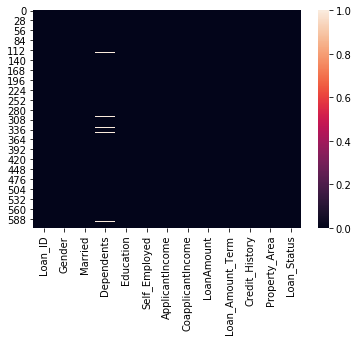

In [22]:
sns.heatmap(df.isnull())

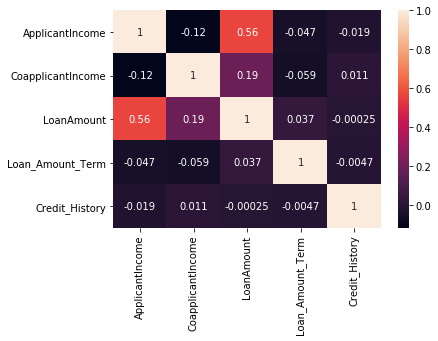

In [23]:
sns.heatmap(df.corr(),annot=True)

In [24]:
from sklearn.preprocessing import LabelEncoder


la=LabelEncoder()
df['Loan_ID']=la.fit_transform(df['Loan_ID'])
df['Gender']=la.fit_transform(df['Gender'])
df['Married']=la.fit_transform(df['Married'])

df['Education']=la.fit_transform(df['Education'])
df['Self_Employed']=la.fit_transform(df['Self_Employed'])

df['Property_Area']=la.fit_transform(df['Property_Area'])
df['Loan_Status']=la.fit_transform(df['Loan_Status'])


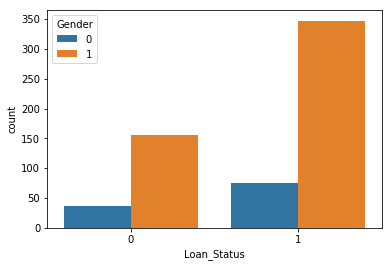

In [25]:
sns.countplot(x='Loan_Status',hue='Gender',data=df)

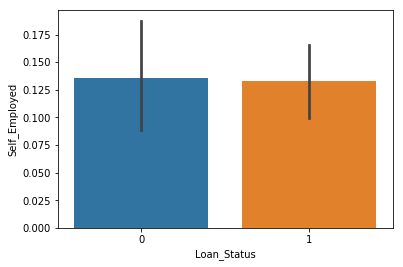

In [26]:
sns.barplot(x='Loan_Status',y='Self_Employed',data=df)

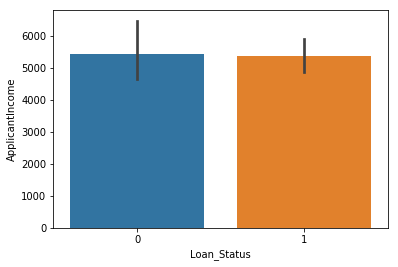

In [27]:
sns.barplot(x='Loan_Status',y='ApplicantIncome',data=df)

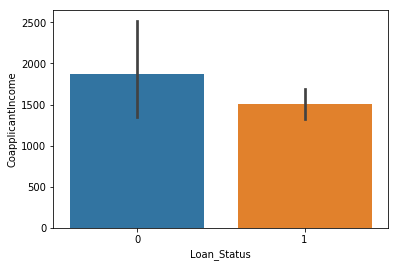

In [28]:
sns.barplot(x='Loan_Status',y='CoapplicantIncome',data=df)

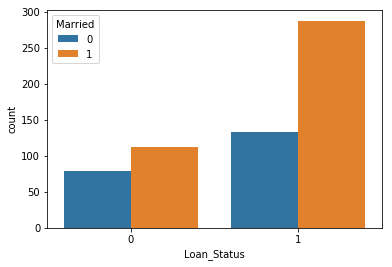

In [29]:
sns.countplot(x='Loan_Status',hue='Married',data=df)

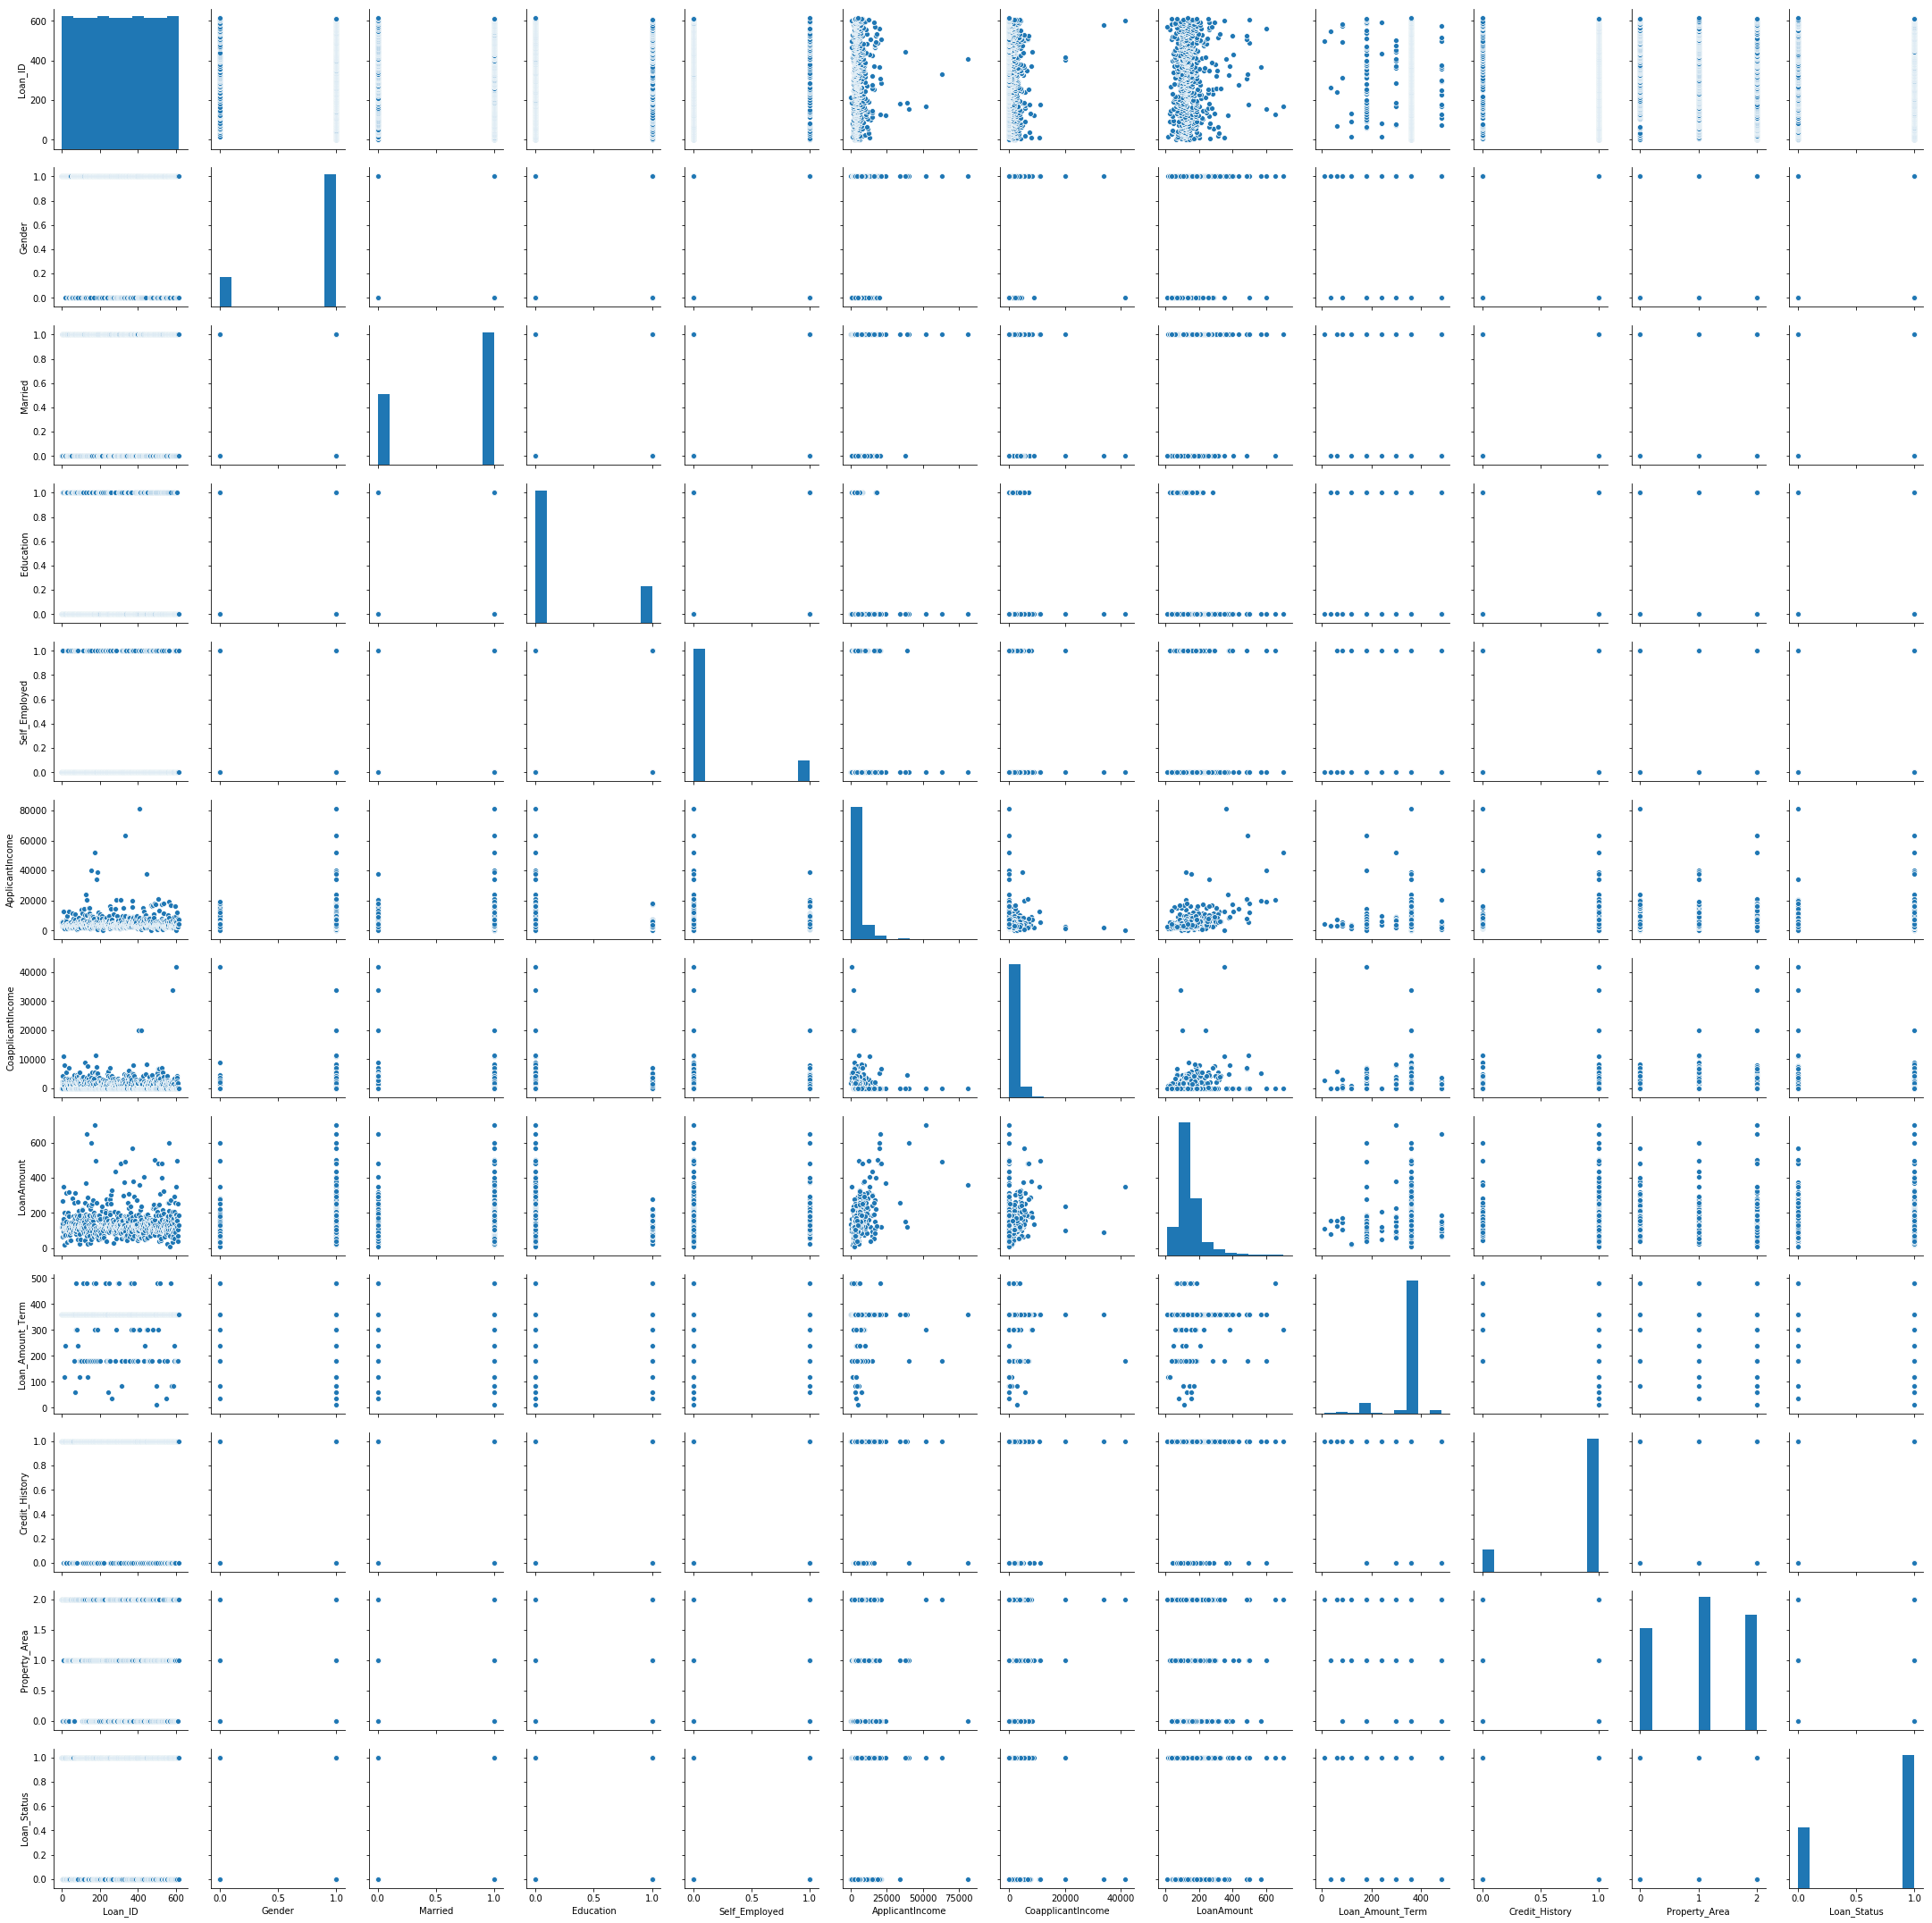

In [30]:
sns.pairplot(df)

In [31]:
df.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [32]:
x=df.iloc[:,:-1]
x=df.drop('Dependents',axis=1)

In [33]:
y=df['Loan_Status']

In [34]:
#lets use labelencoder to convert target class into integers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)


In [35]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [36]:
df.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [37]:
#since it is imbalanced dataset so we will focus on auc-roc score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20,stratify=y)
        
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        ("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

C:\Users\CG-DTE\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

model=[LogisticRegression(),DecisionTreeClassifier()]
for m in model:
    max_aucroc_score(m,x,y)
    print(m)
    print("Mean auc_roc score for: ",m,cross_val_score(m,x,y,cv=5,scoring="roc_auc").mean())
    print("standard deviation in auc_roc score for : ",m,cross_val_score(m,x,y,cv=5,scoring="roc_auc").std())
    print(cross_val_score(m,x,y,cv=5,scoring="roc_auc"))
    print('*************************************************************************************************')
    


max auc roc score corresponding to  42  is  1.0
LogisticRegression()
Mean auc_roc score for:  LogisticRegression() 0.9996256667309298
standard deviation in auc_roc score for :  LogisticRegression() 0.000607652857785653
[1.         1.         0.99969475 1.         0.99843358]
*************************************************************************************************
max auc roc score corresponding to  42  is  1.0
DecisionTreeClassifier()
Mean auc_roc score for:  DecisionTreeClassifier() 1.0
standard deviation in auc_roc score for :  DecisionTreeClassifier() 0.0
[1. 1. 1. 1. 1.]
*************************************************************************************************


In [39]:
#Lets use random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'n_estimators': 100}

In [40]:

#Lets use random forest classifier
#Lets print auc roc score and confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
lg = RandomForestClassifier(n_estimators=500)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
print('roc_auc:\n',roc_auc_score(y_test,y_pred))

print('confusion_matrix:\n',confusion_matrix(y_test,y_pred))
print('classification_report:\n',classification_report(y_test,y_pred))




roc_auc:
 1.0
confusion_matrix:
 [[43  0]
 [ 0 80]]
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        80

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[43  0]
 [ 0 80]]
f1 score is :  1.0
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        80

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123

AUC ROC Score:  1.0


In [42]:

print(cross_val_score(lg,x,y,cv=5,scoring="roc_auc"))

[1. 1. 1. 1. 1.]


In [43]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head

<bound method NDFrame.head of      Actual  Predicted
0         1          1
1         1          1
2         1          1
3         1          1
4         1          1
5         1          1
6         1          1
7         1          1
8         0          0
9         0          0
10        0          0
11        1          1
12        1          1
13        1          1
14        1          1
15        1          1
16        1          1
17        1          1
18        1          1
19        1          1
20        1          1
21        1          1
22        1          1
23        1          1
24        1          1
25        1          1
26        1          1
27        0          0
28        1          1
29        1          1
..      ...        ...
93        1          1
94        1          1
95        1          1
96        1          1
97        1          1
98        0          0
99        1          1
100       1          1
101       1          1
102       1          1
103 

In [44]:
#Lets save this model using joblib
#Lets save the above model
from joblib import dump, load
dump(lg, 'loan_pred.joblib') 


['loan_pred.joblib']